/usr2/mkofler/DeepSDF_microstructures/sdf_sampler/plotting.py:36: UserWarning: The following kwargs were not used by contour: 'color'
  ax[0].contour(X*scale[0], Y*scale[1], sdf, levels=[0], color="black", linewidths=0.5)


FileNotFoundError: [Errno 2] No such file or directory: '/usr2/mkofler/DeepSDF_microstructures/evaluation_scripts/paper/evaluation_scripts/wccm/training_sdfs.png'

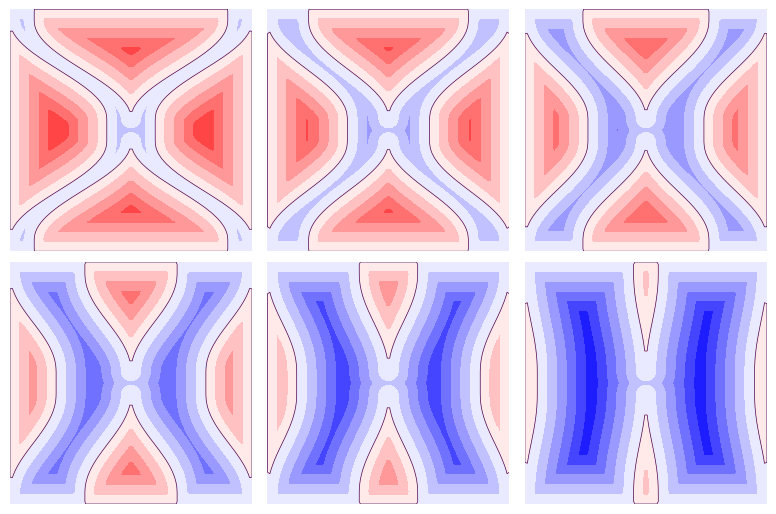

In [1]:
import gustaf as gus
import numpy as np
import splinepy as sp
import vedo

vedo.settings.default_backend = "k3d"
import matplotlib.pyplot as plt
import trimesh

from sdf_sampler import sdf_sampler
from sdf_sampler.plotting import scatter_contour_at_z_level
from sdf_sampler.snappy_3d import Snappy3D

geometry_dir = "data/geometry/snappy_tile"
outdir = "data/SdfSamples"
splitdir = "data/splits"
SDF_sampler = sdf_sampler.SDFSampler(outdir, splitdir)
cm_to_inch = 1/2.54
fig, ax = plt.subplots(2, 3, figsize=(20*cm_to_inch,13.33*cm_to_inch), )
ax = ax.flatten()

sdfs = []

cam = {
    "position": (-0.680960, -0.347974, -2.80654),
    "focal_point": (0.436938, 0.474209, 0.238206),
    "viewup": (-0.942526, 0.0922912, 0.321133),
    "roll": 84.5366,
    "distance": 3.34607,
    "clipping_range": (2.09327, 5.53179),
}
tiles = []
for i, t in enumerate(np.linspace(0, 0.7, 6)):
    tile_creator = Snappy3D()
    tile = tile_creator.create_tile(parameters=np.array([[t]]))
    for t in tile[0]:
        t.show_options["knots"] = False
        t.show_options["control_points"] = False
    tiles.append(tile[0])
    mesh = sp.helpme.extract.faces(sp.multipatch.Multipatch(tile[0]), 20)
    # scale from [0,1] to [-1,1]
    mesh.vertices = mesh.vertices*2 - np.array([1, 1, 1])
    t_mesh = trimesh.Trimesh(vertices=mesh.vertices, faces=mesh.faces)
    base_sdf = sdf_sampler.SDFfromMesh(t_mesh)
    box_sdf = -sdf_sampler.BoxSDF()
    combined_sdf = base_sdf + box_sdf
    # print(base_sdf(np.array([[0.,2.,0.]])))
    # combined_sdf = box_sdf
    sdfs.append(combined_sdf)
    ax[i].set_axis_off()
    # ax[i].set_ylim(-0.99, 0.99)
    scatter_contour_at_z_level(sdfs[i], eval_area=(-1,1), custom_zoom=None, flip_axes=True, custom_axis=ax[i])

fig.tight_layout()
plt.savefig("screenshots/training_sdfs.png", dpi=300)
plt.show()

gus.show(*tiles, cam=cam, c="#EDEDED", interactive=False)